<div style="border: 2px solid darkblue; padding: 10px;
            border-radius: 10px; width: 300px; background-color:white; color:black">
  <strong>Completed by:</strong> Aamir Sitponiya<br>
  <strong>LinkedIn:</strong> <a href="https://www.linkedin.com/in/aamir-sitponiya-0a667b176/" style="color:black"><u>Aamir Sitponiya</u></a><br>
</div>

# <a id='1'> Table of Contents </a>

1. [Introduction](#intro)
2. [Proposal](#2)
3. [Attribute Information](#3)
4. [Importing Libraries](#4)
5. [Data Loading](#5)
6. [Exploratory Data Analysis (EDA)](#66)
7. [Data Preprocessing](#7)
8. [Model Training With Train Test Split Based on Dates](#8)
    - [Logistics Regression](#8_1)
    - [Decision Tree](#8_2)
    - [XGBoost Classifier](#8_3)
    - [Model Evaluation](#8_4)
9. [Model Training With Train Test Split Based on Ratio 4:1](#9)
    - [Logistics Regression](#9_1)
    - [Decision Tree](#9_2)
    - [XGBoost Classifier](#9_3)
    - [Model Evaluation](#9_4)
10. [XGBoost with Permutation Feature Importance (PFI)](#ratio)
    - [Based On Ratio 4:1](#ratio)
    - [Based On Dates](#dates)
11. [Confusion Martix with Type 1 & 2 errors (summary)](#confusion)
12. [Conclusions & Recommendations](#12)
13. [SQL](#13)

# <a id='intro' href=#1> Introduction </a>
<div style="margin-left:10%;width:80%;text-align:justify"> 
Each one of us has been through the <b>COVID-19 pandamic</b>. That's a different question that are we affected with that virus or not. But we knows that the widespread of corona virus has <b>affected millions of people whole around the world</b> and among all the affected patient some may died and some of them are cured and still some are fighting with this corona virus.

Since, when it is under knowledge of doctors, the <b>most challenging part</b> and we can say that the thoughfest part was to <b>detect the virus</b> in a person, that, what are the symptoms and what are the different signs from which they can decide that a patient is positive or negative. These detection or decision which needs to be taken was a biggest challenge to the health care field.

So therefore, the medical field has <b>started recording each and every individual details</b> with information of collecting different symptoms which was present in a patient <b>at the time of RT-PCR test.</b>

<b>And there a data-scientist comes in consideration which plays a very important role in analyse these datas and prepare a ML model which will help predicting either a patient is positive or negative.</b>

And this is what we have been given with the information of more than 2.5 lakh patients data.</div>

# <a id='2' href=#1> Proposal </a>
<div style="margin-left:10%;width:80%;text-align:justify"> 
A <b>predictive model was proposed to predict COVID-19 based on symptoms</b> defined in the given dataset.

Here we this information I have try to analyse the whole data and perform <a href="#66">EDA</a> and do some <a href="#6_9" >hypothesis testing</a> also.

Further I have done some data preprocessing and then train the model. At this <a href="#8">Model Development</a> Stage I will performing my model traing based on (train test split by dates) and (a ratio of 4:1).

Then after I have done Model Evaluation and check how well my different models are performing. If there are errors, I will try to reduce it. 

I have also performed <a href="#10">Permutation Feature Importance</a> Technique to reduce errors.

</div>

# <a id='3' href=#1> Attribute Information </a>
<table>
    <thead>
        <tr>
            <th>Attributes</th>
            <th>Attributes Information</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Ind_id:</b></td>
            <td>Individual ID</td>
        </tr>
        <tr>
            <td><b>Test_date:</b></td>
            <td>Date When a test is done</td>
        </tr>
        <tr>
            <td><b>Cough_symptoms:</b></td>
            <td>Has Cough (True/False)</td>
        </tr>
        <tr>
            <td><b>Fever:</b></td>
            <td>Has Fever (True/False)</td>
        </tr>
        <tr>
            <td><b>Sore_throat:</b></td>
            <td>Has Sore throat (True/False)</td>
        </tr>
        <tr>
            <td><b>Shortness_of_breath:</b></td>
            <td>Has Shortness of breath (True/False)</td>
        </tr>
        <tr>
            <td><b>Headache:</b></td>
            <td>Has Headache (True/False)</td>
        </tr>
        <tr>
            <td><b>Age_60_above:</b></td>
            <td>Above 60 years of Age (True/False)</td>
        </tr>
        <tr>
            <td><b>Sex:</b></td>
            <td>(Male/Female)</td>
        </tr>
        <tr>
            <td><b>Known_contact:</b></td>
            <td>Is patient was in contact with (Abroad/Contact with confirmed/Other)</td>
        </tr>
        <tr>
            <td><b>Corona:</b></td>
            <td>Result After Test(Positive/Negative/Other)</td>
        </tr>
    </tbody>
</table> 

# <a id='4' href=#1> Importing Libraries </a>

In [117]:
# data processing
import pandas as pd
import numpy as np

#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from scipy.stats import chi2_contingency


#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#model improvement
from sklearn.inspection import permutation_importance

#evaluation
from sklearn.metrics import confusion_matrix,precision_score,recall_score

import warnings
warnings.filterwarnings('ignore')

# <a id='5' href=#1> Data Loading  </a>

In [2]:
corona_df = pd.read_csv('corona_tested_006.csv')

In [3]:
corona_df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11/3/2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11/3/2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11/3/2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11/3/2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11/3/2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


# <a id='66' href=#1> Exploratory Data Analysis (EDA) </a>

<b style="font-size:20px;">6.1 </b> Let's start by checking the shape (no. of rows and columns) of the data and the data type of each feature.

In [4]:
print(f'Shape of the data: {corona_df.shape}')
print(f'There are {corona_df.shape[0]} rows in the data.\n')

corona_df.info()

Shape of the data: (278848, 11)
There are 278848 rows in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Observation result:
- There are **10 columns of categorical data** that are already in the form of objects, so I don't need to change the data type anymore.
- <b>test_date is treated as categorical data but it will not make any sense to our model while prediction because it is just the date when which a corona   
  test is done.</b>

- <b>But here I will not drop test_date column now because as it is mentioned in the question set that I have to consider train test split on basis of      
  test_date. So, Therefore from 11th March till 15th April dataset i will consider it for training and validation set & From 16th April till 30th April as a test set.</b>

- There is one 1 column of numerical type and it just unique identification of record which will also not going to help while prediction.

<b style="font-size:20px;">6.2 </b> Next, I am going to check duplicated data.

In [5]:
corona_df[corona_df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


Observation result:
- Hence, There is no duplicated data in our dataset.

<b style="font-size:20px;">6.3 </b> Next, I will check the missing data in our dataset

In [6]:
corona_df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Observation result:
- <b>Ind ID</b> is just unique number I will simply drop it.
- <b>Cough_symptoms</b> has 252 null values and i will fill it by using imputation technique.
- <b>Fever</b> has also 252 null values and i will fill it by using imputation techniques.
- <b>Sore_throat, Headache,Shortness_of_breath</b> has only 1 missing value, for that i will check does it rely in same row. If yes i will drop it.
- <b>Age_60_above</b> is having around 50% of null values so I will look forward by checking the distribution with corona results.
- <b>Sex</b> has 19563 missing values i will it by using imputation technique.

<b style="font-size:20px;">6.4 </b> 
- Checking if a row consiting of more than 4 features with null values. If yes i will drop that row.<br>

In [7]:
dropRowThresh = corona_df[corona_df.isnull().sum(axis=1) > 4]
dropRowThresh

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
577,578,12/3/2020,NaN,NaN,NaN,NaN,NaN,positive,NaN,NaN,Other


In [8]:
# Dropping Above Row
corona_df.drop(corona_df[corona_df.isnull().sum(axis=1) > 4].index,axis=0, inplace=True)

In [9]:
corona_df['Corona'].value_counts()

Corona
negative    260227
positive     14728
other         3892
Name: count, dtype: int64

<b style="font-size:20px;">6.5  </b> Checking our target Variable Distribution

In [10]:
# Create a function to calculate value counts for a specified variable
def val_counts(df, var):
    results = df[var].value_counts(sort=False)
    labels = results.index
    counts = results.values
    return labels, counts

# Green,cream,lightbrown
colors = ['#E5E5CB','#43766C','#D5CEA3']
explode = (0.05, 0) # Explode the first slice for emphasis 
def visualize_piechart(labels=None, values= None, 
                       explode=None, colors=colors,var=None):
    
    ## Create a Pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                                 pull=explode, 
                                 marker=dict(
                                     colors=colors,
                                     line=dict(color='#000000', width=2)))])

    # Adjusting the position of the horizontal legend
    fig.update_layout(
        legend=dict(
            x=0.5, y=1.15, 
            xanchor='center',
            orientation='h',  # Horizontal orientation
            bgcolor='rgba(211,211,211,0.3)',  # legend background
            font=dict(size=12)    
        ),
        title=dict(text=f'{var} Distribution', x=0.5, y=0.95) 
    )
    
    return fig.show()

In [11]:
labels = val_counts(corona_df, 'Corona')[0]
values= val_counts(corona_df, 'Corona')[1]

visualize_piechart(labels=labels, values= values,explode=explode,var='Corona Result')

Observation Result:
- From the above figure it seems that most 93.3% of our dataset has result negative and only 5.28% is positive.
- But Here result as <b>Other</b> will create some anomaly while taking a proper decision so therefore I will turn <b>Other</b> result to <b>negative</b>.

In [12]:
# replacing Corona result "other" with "negative"
corona_df['Corona'] = corona_df['Corona'].replace('other','negative')

In [13]:
labels = val_counts(corona_df, 'Corona')[0]
values= val_counts(corona_df, 'Corona')[1]

visualize_piechart(labels=labels, values= values,explode=explode,var='Corona Result')

In [14]:
# Querying the DataFrame to separate data for Age Above 60 and below 60
colors = ['#E5E5CB','#43766C','#D5CEA3']

query_age60above_no= corona_df.query('Age_60_above=="No"')
query_age60above_yes= corona_df.query('Age_60_above=="Yes"')

labels_no = val_counts(query_age60above_no, 'Corona')[0]
values_no= val_counts(query_age60above_no, 'Corona')[1]
labels_yes = val_counts(query_age60above_yes, 'Corona')[0]
values_yes= val_counts(query_age60above_yes, 'Corona')[1]


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_no, values=values_no, 
                     marker=dict(colors=colors)
                    ),
              row=1, col=1)
fig.add_trace(go.Pie(labels=labels_yes, values=values_yes, 
                     marker=dict(colors=colors)
                    ),
              row=1, col=2)

# Use `hole` to create a donut-like pie chart
# Use `hoverinfo` to define what information is displayed 
# when the user hovers the cursor over data points
fig.update_traces(hole=.4, hoverinfo="label+value+percent")

fig.update_layout(
    title_text="Distribution of Age_Above_60 by Corona Result",

    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Below 60', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Above 60', x=0.82, y=0.5, font_size=20, showarrow=False)],
    
    # Adjusting the position of legend
    legend=dict(x=0.5, y=1.1, xanchor='center',
        orientation='h',  # Horizontal orientation
        bgcolor='rgba(211,211,211,0.3)',  # legend background color
        font=dict(size=12))
)
fig.show()

Observation Result
- From the above figure it seems that <b>Age_60_above</b> is having some kind of impact on <b>Corona</b> and even it consists of around 50% of null values. Since, it has an impact to corona though its very less but instead of droping i will fill with random value from the same column. 

In [15]:
corona_df = corona_df.drop(columns=['Ind_ID'])

<b style="font-size:20px;">6.6 </b> Imputation

In [16]:
corona_df.isnull().sum()

Test_date                   0
Cough_symptoms            251
Fever                     251
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127319
Sex                     19562
Known_contact               0
dtype: int64

<Axes: xlabel='Cough_symptoms'>

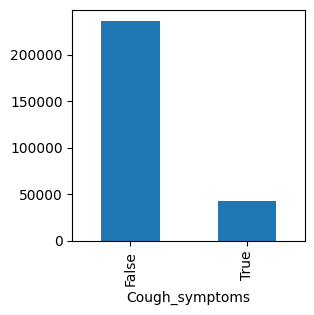

In [17]:
corona_df['Cough_symptoms'].value_counts().plot(kind='bar',figsize=(3,3))

As Shown in the figure the most frequent value in <b>Cough_symptoms</b> is False 

<Axes: xlabel='Fever'>

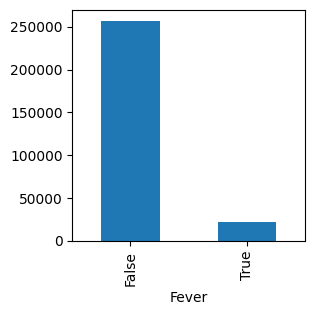

In [18]:
corona_df['Fever'].value_counts().plot(kind='bar',figsize=(3,3))

As Shown in the figure the most frequent value in <b>Fever</b> is False 

In [19]:
# Imputing cough_symptoms and fever with False value
corona_df['Cough_symptoms'].fillna(corona_df['Cough_symptoms'].mode()[0],inplace=True)
corona_df['Fever'].fillna(corona_df['Fever'].mode()[0],inplace=True)

Sex
female    130158
male      129127
Name: count, dtype: int64

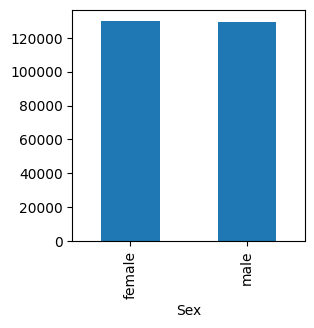

In [20]:
corona_df['Sex'].value_counts().plot(kind='bar',figsize=(3,3))
corona_df['Sex'].value_counts()

As we can see that the <b>Sex</b> Feature has almost same number of categorical data so here I will try to fill the missing values with randomly picked values from the same column. Side by side i will do the same for age_above_60 feature also.

In [21]:
corona_df['Sex_Imputed'] = corona_df['Sex']
corona_df['Age_60_above_Imputed'] = corona_df['Age_60_above']

In [22]:
# Filling Sex_imputed missing values with random value from Sex Column
corona_df['Sex_Imputed'][corona_df['Sex_Imputed'].isnull()] = corona_df['Sex'].dropna().sample(corona_df['Sex'].isnull().sum()).values
corona_df['Age_60_above_Imputed'][corona_df['Age_60_above_Imputed'].isnull()] = corona_df['Age_60_above'].dropna().sample(corona_df['Age_60_above'].isnull().sum()).values

Text(0.5, 1.0, 'After Imputing Sex')

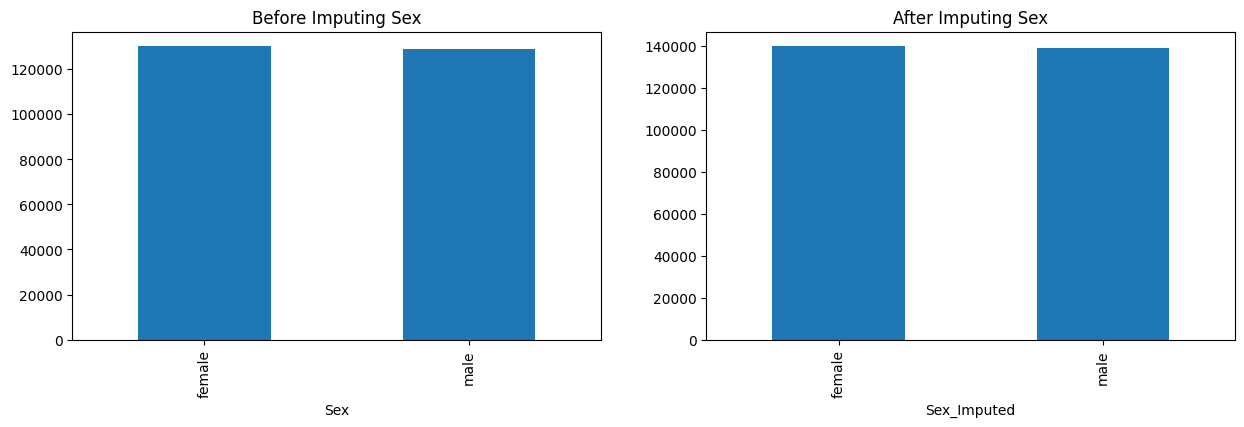

In [23]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
corona_df['Sex'].value_counts().plot(kind='bar')
plt.title('Before Imputing Sex')
plt.subplot(1,2,2)
corona_df['Sex_Imputed'].value_counts().plot(kind='bar')
plt.title('After Imputing Sex')

Observation Result
- As shown in the above figure that the distribution of Sex before imputation and after imputation remains same and it is good to have while using linear models

Text(0.5, 1.0, 'After Imputing Age_60_above')

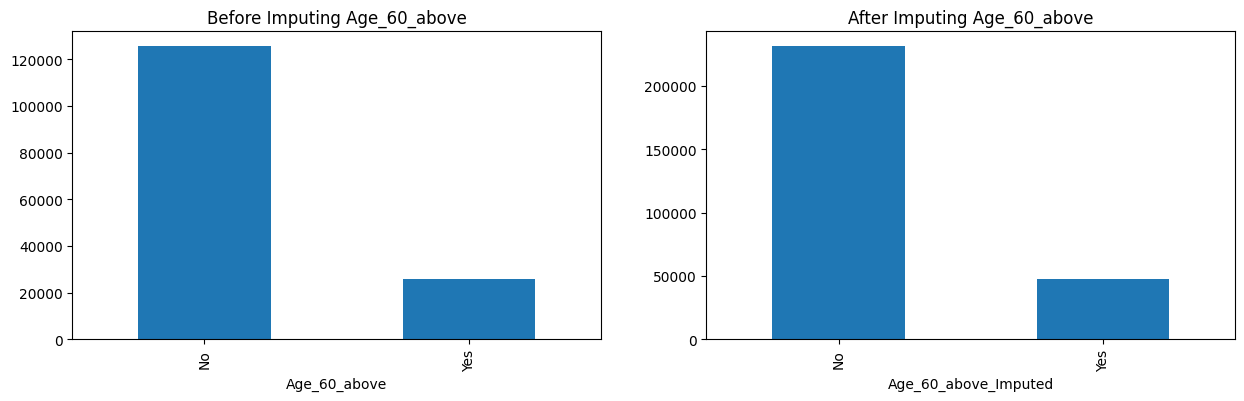

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
corona_df['Age_60_above'].value_counts().plot(kind='bar')
plt.title('Before Imputing Age_60_above')
plt.subplot(1,2,2)
corona_df['Age_60_above_Imputed'].value_counts().plot(kind='bar')
plt.title('After Imputing Age_60_above')

Observation Result:
- As Shown in the figure we can see that the distribution remains same before imputation and after imputation.

In [25]:
corona_df.drop(columns=['Sex'],inplace=True)
corona_df.drop(columns=['Age_60_above'],inplace=True)

In [26]:
corona_df.rename(columns={'Sex_Imputed':'Sex','Age_60_above_Imputed':'Age_60_above'}, inplace=True)

<b style="font-size:20px;">6.7 </b> Encoding

In [27]:
corona_df_new = corona_df.copy()
corona_df_new = pd.get_dummies(corona_df_new, columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex','Age_60_above'],drop_first=True, dtype=int)
corona_df_new = pd.get_dummies(corona_df_new, columns=['Known_contact'],dtype=int)

<b style="font-size:20px;">6.8 </b> Checking Distribution of Corona by Symptoms and Sex

In [28]:
corona_df_dis = corona_df.copy()

In [29]:
corona_df_dis.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Known_contact', 'Sex',
       'Age_60_above'],
      dtype='object')

In [30]:
corona_df_dis = pd.get_dummies(corona_df_dis,columns=['Sex'],drop_first=True)
def corona_symtoms_df(lst):
        cough = {'Symptoms':[],
         'Negative_True' : [],
         'Positive_True' : [],
         'Negative_False' : [],
         'Positive_False' : [],
        }
        for i in range(len(lst)):
                True_Negative = corona_df_dis.query(f'Corona==\'negative\' & {lst[i]} == True')[lst[i]].value_counts()
                False_Negative = corona_df_dis.query(f'Corona==\'negative\' & {lst[i]} == False')[lst[i]].value_counts()
                True_Positive = corona_df_dis.query(f'Corona==\'positive\' & {lst[i]} == True')[lst[i]].value_counts()
                False_Positive = corona_df_dis.query(f'Corona==\'positive\' & {lst[i]} == False')[lst[i]].value_counts()
                cough['Symptoms'].append(lst[i])
                cough['Negative_True'].append(True_Negative[0])
                cough['Negative_False'].append(False_Negative[0])
                cough['Positive_True'].append(True_Positive[0])
                cough['Positive_False'].append(False_Positive[0])
        return cough
                
                
lst = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex_male']
cough = corona_symtoms_df(lst)

my_df = pd.DataFrame(cough)
my_df

,Symptoms,Negative_True,Positive_True,Negative_False,Positive_False
0,Cough_symptoms,35644,6584,228475,8144
1,Fever,16193,5559,247926,9169
2,Sore_throat,400,1526,263719,13202
3,Shortness_of_breath,413,1164,263706,13564
4,Headache,179,2235,263940,12493
5,Sex_male,130803,8131,133316,6597


In [31]:
fig = px.bar(my_df, x="Symptoms", y=["Negative_True", "Negative_False", "Positive_True","Positive_False"], title="Symptoms And Corona Result")
fig.update_layout(
    width=1200,
    height=500,
    title_text="Distribution of Corona Result By Symptoms & Sex",
    
    # Adjusting the position of legend
    legend=dict(
        orientation='v',  # Horizontal orientation
        bgcolor='rgba(211,211,211,0.3)',  # legend background color
        font=dict(size=12)),
        legend_title_text='Corona_Symptoms/Sex_male'
)
fig.show()

Observation Result:
- Red Bar In Each Symptoms shows that people who don't have symptoms are more likely to be Corona Negative.
- Green Bar In Each Symptoms shows that people who have symptoms they are very less likely to be Corona Positive.
- Blue Bar In Each Symptoms shows that people who have symptoms and they are Coroan negative and in only COugh_symptoms and Fever we can see that.<br>
But in Other symtoms they are very less like less than 450.
- Purple Bar Represents that people who don't have symptoms they are more likely to be Corona Positive as compared to who have symptoms and are positive.<br> Check the First 2 stack which purple and green.
- If wee see last bar for sex (under that green and purple stack), it shows that male are more likely to be Corona Positive than female. But still the numbers are very less in both male and female as compared to Corona Negative (Bottom 2 Stack i.e., Blue and Red).

<b style="font-size:20px;">6.9 </b> <a id='6_9' href=#1>Hypothesis Testing</a>

In this stage, I will attempt to answer the question: <br>
- "Does the <b>Corona result</b> for people who have <b>Cough_symptoms</b> differ significantly from people who don't have <b>Cough_symptoms</b>?"<br>
- "Does the <b>Corona result</b> for people who have <b>Fever</b> differ significantly from people who don't have <b>Fever</b>?"<br>
- "Does the <b>Corona result</b> for people who are <b>Male</b> differ significantly from people who are <b>Female</b>?"<br>

To answer this question we will use hypothesis testing and as these are categorical columns so for that I will perform <b>Chi-Square Test</b>.


In [32]:
# Creating a function for approval or rejection message
def hypothesistest(value1,value2):
    # Performing Test
    observed_values = pd.crosstab(corona_df_new[value1],corona_df_new[value2])
    chi2_stat, p, dof, expected = chi2_contingency(observed_values)
    # Set the significance level (alpha)
    alpha = 0.05

    # Compare p-value with alpha and make a conclusion
    if p < alpha:
        return f"Reject the null hypothesis"
    else:
        return f"Fail to reject the null hypothesis"

<b>Test 1</b> 
- "Does the <b>Corona result</b> for people who have <b>Cough_symptoms</b> differ significantly from people who don't have <b>Cough_symptoms</b>?"

In [33]:
hypothesistest('Corona','Cough_symptoms_True')

'Reject the null hypothesis'

<b>Test 2</b> 
- "Does the <b>Corona result</b> for people who have <b>Fever</b> differ significantly from people who don't have <b>Fever</b>?"<br>

In [34]:
hypothesistest('Corona','Fever_True')

'Reject the null hypothesis'

<b>Test 3</b> 
- "Does the <b>Corona result</b> for people who are <b>Male</b> differ significantly from people who are <b>Female</b>?"<br>

In [35]:
hypothesistest('Corona','Sex_male')

'Reject the null hypothesis'

From the above all the hypothesis testing it seems that the corona result differs significantly as our test is reject the null hypothesis.

<b style="font-size:20px;">6.10 </b> Next I will Attempt to check the correlation.

In [36]:
corona_df_new['Corona'] = corona_df_new['Corona'].map({'negative':0,'positive':1})

In [37]:
corona_df_new.sample(5)

,Test_date,Corona,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_male,Age_60_above_Yes,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
135421,12/4/2020,0,0,0,0,0,0,0,0,0,0,1
88010,3/4/2020,0,0,0,0,0,0,0,0,0,0,1
153384,14-04-2020,0,0,0,0,0,0,0,1,0,0,1
246501,25-04-2020,0,0,0,0,0,0,0,0,0,0,1
63138,31-03-2020,0,0,0,0,0,0,0,0,0,0,1


In [38]:
def viz_heatmap(data=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt=".2f", 
                cmap = 'bwr', 
                mask=np.triu(data)); #only display the upper triangle of the correlation matrix

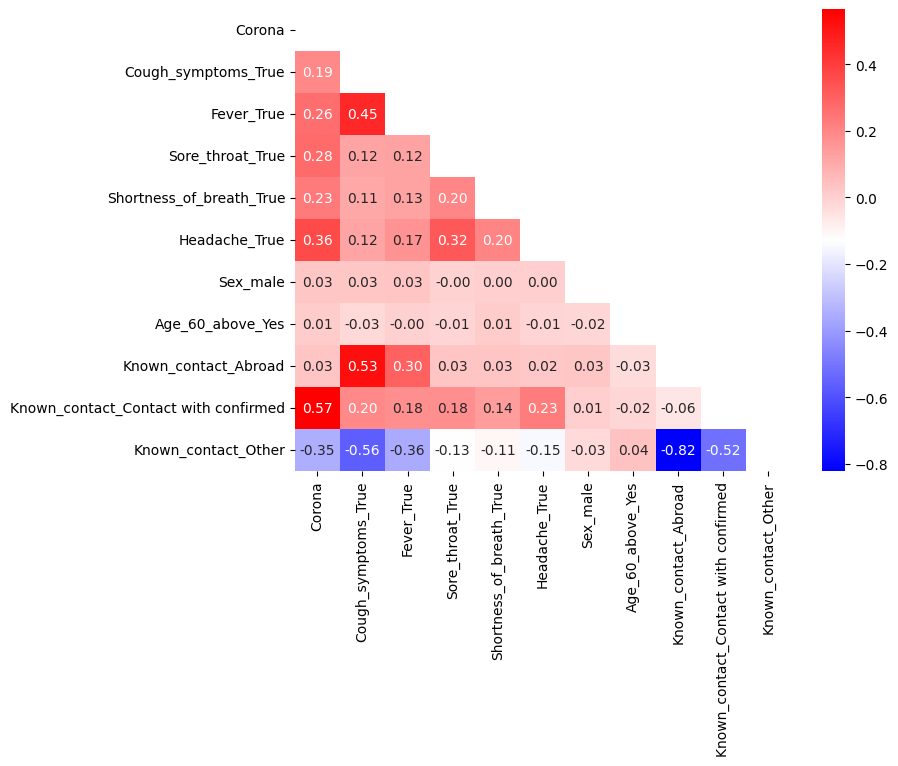

In [39]:
corr_1 = corona_df_new.drop(columns=['Test_date']).corr(method='pearson')
viz_heatmap(data=corr_1)

Observation Result
- From the above figure its observed that the Corona has 57% of Relation with Contact_with_confirmed.
- Apart from that Corona has negative relationship with contact_other.
- And if we talk about sypmtoms, has around 25% to 35% of relationship with corona.

Next, I will conduct several experiments on Feature Engineering and Machine Learning Algorithms

# <a id='7' href=#1> Data Preprocessing </a>

In [40]:
corona_df_pro = corona_df.copy()
corona_df_pro['Corona'] = corona_df_pro['Corona'].map({'negative':0,'positive':1})

Treating test date as some are seprated with / and some are with -, like '11/3/2020' and '14-04-2020' and changing format

In [41]:
corona_df_pro['Test_date'] = corona_df_pro['Test_date'].str.replace('/','-')
corona_df_pro['Test_date'] = pd.to_datetime(corona_df_pro['Test_date'],format='%d-%m-%Y')
corona_df_pro.sample(5)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact,Sex,Age_60_above
21105,2020-03-24,False,False,False,False,False,0,Other,male,No
49573,2020-03-29,True,False,False,False,False,0,Abroad,female,No
178224,2020-04-17,False,False,False,False,False,0,Other,female,No
122067,2020-04-09,False,False,False,False,False,0,Other,female,No
114997,2020-04-07,False,True,False,False,False,0,Other,male,No


As Per Question I will Split tha Data Based On Dates and Ratio 4:1

1. Splitting Train Test Data Based on Dates Where from <b>11th March</b> till <b>15th April</b> as a <b>training</b> and <b>validation</b> set. From <b>16th April till 30th April</b> as a <b>test set</b>.

In [42]:
train = corona_df_pro[corona_df_pro['Test_date'] <= '2020-04-15']
test = corona_df_pro[corona_df_pro['Test_date'] > '2020-04-15']

In [43]:
print(f"The Overall Dataset Has Total {corona_df_pro.shape[0]} rows and {corona_df_pro.shape[1]} columns")
print(f"The Train Dataset Has Total {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The Test Dataset Has Total {test.shape[0]} rows and {test.shape[1]} columns")

The Overall Dataset Has Total 278847 rows and 10 columns
The Train Dataset Has Total 163188 rows and 10 columns
The Test Dataset Has Total 115659 rows and 10 columns


In [44]:
# Seprating X_train,y_train,X_test,y_test
X_train = train.drop(columns=['Corona','Test_date'])
y_train = train['Corona']
X_test = test.drop(columns=['Corona','Test_date'])
y_test = test['Corona']

In [45]:
X_train.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact,Sex,Age_60_above
0,True,False,True,False,False,Abroad,male,Yes
1,False,True,False,False,False,Abroad,male,No
2,False,True,False,False,False,Abroad,male,Yes
3,True,False,False,False,False,Abroad,female,No
4,True,False,False,False,False,Contact with confirmed,male,Yes


In [46]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (163188, 8)
X_test Shape: (115659, 8)
y_train Shape: (163188,)
y_test Shape: (115659,)


2. Splitting Train Test Data Based on 4:1 Ratio.

In [47]:
X_train_ratio,X_test_ratio,y_train_ratio,y_test_ratio = train_test_split(corona_df_pro.drop(columns=['Corona','Test_date']),
                                                 corona_df_pro['Corona'],
                                                 test_size=0.25,
                                                random_state=42)

In [48]:
print(f"X_train_ratio Shape: {X_train_ratio.shape}")
print(f"X_test_ratio Shape: {X_test_ratio.shape}")
print(f"y_train_ratio Shape: {y_train_ratio.shape}")
print(f"y_test_ratio Shape: {y_test_ratio.shape}")

X_train_ratio Shape: (209135, 8)
X_test_ratio Shape: (69712, 8)
y_train_ratio Shape: (209135,)
y_test_ratio Shape: (69712,)


Column Transformation & Creating Pipeline

In [49]:
categorical_biner = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex','Age_60_above']
categorical_nominal= ['Known_contact']

enc_1 = OrdinalEncoder(categories=[X_train['Cough_symptoms'].value_counts().index,
                                   X_train['Fever'].value_counts().index,
                                   X_train['Sore_throat'].value_counts().index,
                                   X_train['Shortness_of_breath'].value_counts().index,
                                   X_train['Headache'].value_counts().index,
                                   X_train['Sex'].value_counts().index,
                                   X_train['Age_60_above'].value_counts().index],
                     dtype='int8')

enc_2 = OneHotEncoder(sparse=False,dtype='int8')

categorical_biner_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding_ordinal', enc_1),
])

categorical_nominal_pipepline= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding_ohe', enc_2),
])

In [50]:
preproc_pipeline= ColumnTransformer(
    [
        ('encoder_biner',categorical_biner_pipeline, categorical_biner),
        ('encoder_nominal',categorical_nominal_pipepline, categorical_nominal)
    ],
    remainder='passthrough',
    verbose=True
)

In [51]:
trf1 = Pipeline([
    ('preprocessor', preproc_pipeline)
])

In [52]:
# imputation transformer for Sex
trf2 = ColumnTransformer([
    ('impute_sex',KNNImputer(n_neighbors=5),[6]),
    ('impute_Age_60_above',KNNImputer(n_neighbors=5),[7])
],remainder='passthrough')

# <a id='8' href=#1> Model Training With Train Test Split Based on Test_Dates</a>

## <a id='8_1' href="#1"> Logistic regression</a>

In [53]:
# train the model
trf3 = LogisticRegression()

In [54]:
# make pipeline Syntax
pipe = make_pipeline(trf1,trf2,trf3)

In [55]:
# train
pipe.fit(X_train,y_train)

[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.9s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encoder_biner',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ordinal',
                                                                                    OrdinalEncoder(categories=[Index([False, True], dtype='bool', name='Cough_symptoms'),
                                                                                                               Index([False, True], dtype='bool', name='Fever'),
                                                                                                               I...
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ohe',
                                                                                    OneHotEncoder(dtype='int8',
                                                                                                  sparse=False))]),
                                                                   ['Known_contact'])],
                                                    verbose=True))])),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_sex', KNNImputer(),
                                                  [6]),
                                                 ('impute_Age_60_above',
                                                  KNNImputer(), [7])])),
                ('logisticregression', LogisticRegression())])

In [56]:
y_pred = pipe.predict(X_test)

## <a id='8_2' href="#1"> Decision Tree</a>

In [57]:
# train the model
trf3_1 = DecisionTreeClassifier()

In [58]:
pipe1 = make_pipeline(trf1,trf2,trf3_1)

In [59]:
pipe1.fit(X_train,y_train)

[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.8s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encoder_biner',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ordinal',
                                                                                    OrdinalEncoder(categories=[Index([False, True], dtype='bool', name='Cough_symptoms'),
                                                                                                               Index([False, True], dtype='bool', name='Fever'),
                                                                                                               I...
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ohe',
                                                                                    OneHotEncoder(dtype='int8',
                                                                                                  sparse=False))]),
                                                                   ['Known_contact'])],
                                                    verbose=True))])),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_sex', KNNImputer(),
                                                  [6]),
                                                 ('impute_Age_60_above',
                                                  KNNImputer(), [7])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [60]:
y_pred_1 = pipe1.predict(X_test)

## <a id='8_3' href="#1"> XG Boost Classifier</a>

In [61]:
trf3_2 = XGBClassifier()

In [62]:
pipe2 = make_pipeline(trf1,trf2,trf3_2)

In [63]:
pipe2.fit(X_train,y_train)

[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   1.0s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encoder_biner',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ordinal',
                                                                                    OrdinalEncoder(categories=[Index([False, True], dtype='bool', name='Cough_symptoms'),
                                                                                                               Index([False, True], dtype='bool', name='Fever'),
                                                                                                               I...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [64]:
y_pred_2 = pipe2.predict(X_test)

## <a id='8_4' href="#1"> Models Evaluation</a>

In [65]:
y_test.value_counts()

Corona
0    112961
1      2698
Name: count, dtype: int64

As of our data is imbalanced so therefore we can't go with accuracy we will further check with confusion_matrix, precision, f1_score

In [66]:
# Confusion Matrix 
print(f"Confusion Matrix For Logistic Regression Model\n",confusion_matrix(y_test,y_pred))
print(f"\nConfusion Matrix For Decision Tree Model\n",confusion_matrix(y_test,y_pred_1))
print(f"\nConfusion Matrix For XGBoost Classifier Model\n",confusion_matrix(y_test,y_pred_2))

Confusion Matrix For Logistic Regression Model
 [[112671    290]
 [  2059    639]]

Confusion Matrix For Decision Tree Model
 [[112590    371]
 [  1479   1219]]

Confusion Matrix For XGBoost Classifier Model
 [[112589    372]
 [  1479   1219]]


In [67]:
# Precision Score
print(f"Precision Score For Logistic Regression Model\n",precision_score(y_test,y_pred))
print(f"\nPrecision Score For Decision Tree Model\n",precision_score(y_test,y_pred_1))
print(f"\nPrecision Score For XGBoost Classifier Model\n",precision_score(y_test,y_pred_2))

Precision Score For Logistic Regression Model
 0.6878363832077503

Precision Score For Decision Tree Model
 0.7666666666666667

Precision Score For XGBoost Classifier Model
 0.7661847894406034


In [68]:
# recall_score
print(f"recall_score For Logistic Regression Model\n",recall_score(y_test,y_pred))
print(f"\nrecall_score For Decision Tree Model\n",recall_score(y_test,y_pred_1))
print(f"\nrecall_score For XGBoost Classifier Model\n",recall_score(y_test,y_pred_2))

recall_score For Logistic Regression Model
 0.23684210526315788

recall_score For Decision Tree Model
 0.45181616011860637

recall_score For XGBoost Classifier Model
 0.45181616011860637


Cross Validation

In [69]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
print(f"Cross Validation For Logistic Regression Model\n",cross_val_score(pipe, X_train, y_train, cv=5, scoring='precision').mean())
print(f"\nCross Validation For Decision Tree Model\n",cross_val_score(pipe1, X_train, y_train, cv=5, scoring='precision').mean())
print(f"\nCross Validation For XGBoost Classifier Model\n",cross_val_score(pipe2, X_train, y_train, cv=5, scoring='precision').mean())


[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.7s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
Cross Validation For Logistic Regression Model
 0.7489155735710061
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[Col

# <a id='9' href=#1> Model Training With Train Test Split Based on Ratio 4:1</a>

## <a id='9_1' href="#1"> Logistic regression</a>

In [70]:
# train the model
trf4 = LogisticRegression()

In [71]:
# make pipeline Syntax
pipe_ratio = make_pipeline(trf1,trf2,trf4)

In [72]:
# train
pipe_ratio.fit(X_train_ratio,y_train_ratio)

[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.9s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encoder_biner',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ordinal',
                                                                                    OrdinalEncoder(categories=[Index([False, True], dtype='bool', name='Cough_symptoms'),
                                                                                                               Index([False, True], dtype='bool', name='Fever'),
                                                                                                               I...
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ohe',
                                                                                    OneHotEncoder(dtype='int8',
                                                                                                  sparse=False))]),
                                                                   ['Known_contact'])],
                                                    verbose=True))])),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_sex', KNNImputer(),
                                                  [6]),
                                                 ('impute_Age_60_above',
                                                  KNNImputer(), [7])])),
                ('logisticregression', LogisticRegression())])

In [73]:
y_pred_ratio = pipe.predict(X_test_ratio)

## <a id='9_2' href="#1"> Decision Tree</a>

In [74]:
# train the model
trf4_1 = DecisionTreeClassifier()

In [75]:
pipe1_ratio = make_pipeline(trf1,trf2,trf4_1)

In [76]:
pipe1_ratio.fit(X_train_ratio,y_train_ratio)

[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   1.0s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encoder_biner',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ordinal',
                                                                                    OrdinalEncoder(categories=[Index([False, True], dtype='bool', name='Cough_symptoms'),
                                                                                                               Index([False, True], dtype='bool', name='Fever'),
                                                                                                               I...
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ohe',
                                                                                    OneHotEncoder(dtype='int8',
                                                                                                  sparse=False))]),
                                                                   ['Known_contact'])],
                                                    verbose=True))])),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_sex', KNNImputer(),
                                                  [6]),
                                                 ('impute_Age_60_above',
                                                  KNNImputer(), [7])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [77]:
y_pred_1_ratio = pipe1.predict(X_test_ratio)

## <a id='9_3' href="#1"> XG Boost Classifier</a>

In [78]:
trf4_2 = XGBClassifier()

In [79]:
pipe2_ratio = make_pipeline(trf1,trf2,trf4_2)

In [80]:
pipe2_ratio.fit(X_train_ratio,y_train_ratio)

[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   1.1s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encoder_biner',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoding_ordinal',
                                                                                    OrdinalEncoder(categories=[Index([False, True], dtype='bool', name='Cough_symptoms'),
                                                                                                               Index([False, True], dtype='bool', name='Fever'),
                                                                                                               I...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [81]:
y_pred_2_ratio = pipe2.predict(X_test_ratio)

## <a id='9_4' href="#1"> Models Evaluation</a>

In [82]:
y_test_ratio.value_counts()

Corona
0    65950
1     3762
Name: count, dtype: int64

As of our data is imbalanced so therefore we can't go with accuracy we will further check with confusion_matrix, precision, f1_score

In [83]:
# Confusion Matrix 
print(f"Confusion Matrix For Logistic Regression Model\n",confusion_matrix(y_test_ratio,y_pred_ratio))
print(f"\nConfusion Matrix For Decision Tree Model\n",confusion_matrix(y_test_ratio,y_pred_1_ratio))
print(f"\nConfusion Matrix For XGBoost Classifier Model\n",confusion_matrix(y_test_ratio,y_pred_2_ratio))


Confusion Matrix For Logistic Regression Model
 [[65387   563]
 [ 2203  1559]]

Confusion Matrix For Decision Tree Model
 [[65360   590]
 [ 1703  2059]]

Confusion Matrix For XGBoost Classifier Model
 [[65354   596]
 [ 1696  2066]]


In [84]:
# Precision Score
print(f"Precision Score For Logistic Regression Model\n",precision_score(y_test_ratio,y_pred_ratio))
print(f"\nPrecision Score For Decision Tree Model\n",precision_score(y_test_ratio,y_pred_1_ratio))
print(f"\nPrecision Score For XGBoost Classifier Model\n",precision_score(y_test_ratio,y_pred_2_ratio))

Precision Score For Logistic Regression Model
 0.734684260131951

Precision Score For Decision Tree Model
 0.7772744431861079

Precision Score For XGBoost Classifier Model
 0.7761081893313299


In [85]:
# recall_score
print(f"recall_score For Logistic Regression Model\n",recall_score(y_test_ratio,y_pred_ratio))
print(f"\nrecall_score For Decision Tree Model\n",recall_score(y_test_ratio,y_pred_1_ratio))
print(f"\nrecall_score For XGBoost Classifier Model\n",recall_score(y_test_ratio,y_pred_2_ratio))

recall_score For Logistic Regression Model
 0.4144072301967039

recall_score For Decision Tree Model
 0.5473152578415736

recall_score For XGBoost Classifier Model
 0.5491759702286018


Cross Validation

In [86]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
print(f"Cross Validation For Logistic Regression Model\n",cross_val_score(pipe_ratio, X_train, y_train, cv=5, scoring='precision').mean())
print(f"\nCross Validation For Decision Tree Model\n",cross_val_score(pipe1_ratio, X_train, y_train, cv=5, scoring='precision').mean())
print(f"\nCross Validation For XGBoost Classifier Model\n",cross_val_score(pipe2_ratio, X_train, y_train, cv=5, scoring='precision').mean())


[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.7s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.4s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
Cross Validation For Logistic Regression Model
 0.7489155735710061
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.5s
[ColumnTransformer]  (2 of 2) Processing encoder_nominal, total=   0.1s
[ColumnTransformer] . (1 of 2) Processing encoder_biner, total=   0.7s
[Col

## <a id='ratio' href="#1"> XGBoost with Permutation Feature Importance (PFI) (Train Test Split Based on Ratio 4:1)</a>

In [87]:
# Step 1 -> train/test/split
X_train_pfi,X_test_pfi,y_train_pfi,y_test_pfi = train_test_split(corona_df_new.drop(columns=['Corona','Test_date']),
                                                 corona_df_new['Corona'],
                                                 test_size=0.25,
                                                random_state=42)

In [88]:
model_pfi= XGBClassifier(random_state=42)
model_pfi.fit(X_train_pfi, y_train_pfi)
# Calculating feature importance using permutation method
result = permutation_importance(model_pfi, X_test_pfi, y_test_pfi,
                                n_repeats=20, random_state=42, scoring='recall')

# Organizing feature importance into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train_pfi.columns,
                                      'Importance': result.importances_mean,
                                      '+/- std': result.importances_std})

# Sorting feature importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Displaying the feature importance results
print(feature_importance_df.round(3))

                                Feature  Importance  +/- std
8  Known_contact_Contact with confirmed       0.290    0.002
9                   Known_contact_Other       0.081    0.002
4                         Headache_True       0.057    0.001
1                            Fever_True       0.052    0.001
2                      Sore_throat_True       0.023    0.001
3              Shortness_of_breath_True       0.018    0.001
5                              Sex_male       0.001    0.001
6                      Age_60_above_Yes      -0.003    0.001
7                  Known_contact_Abroad      -0.003    0.001
0                   Cough_symptoms_True      -0.032    0.003


In [89]:
selected_pfi= feature_importance_df.query("Importance>0.")['Feature'].values
selected_pfi

array(['Known_contact_Contact with confirmed', 'Known_contact_Other',
       'Headache_True', 'Fever_True', 'Sore_throat_True',
       'Shortness_of_breath_True', 'Sex_male'], dtype=object)

In [90]:
trfpfi = XGBClassifier(random_state=42)

In [91]:
pipe3 = make_pipeline(trfpfi)

In [92]:
pipe3.fit(X_train_pfi[selected_pfi],y_train_pfi)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [93]:
y_pred_3 = pipe3.predict(X_test_pfi[selected_pfi])

In [94]:
confusion_matrix(y_test_pfi,y_pred_3)

array([[65014,   936],
       [ 1451,  2311]], dtype=int64)

## <a id='dates' href="#1"> XGBoost with Permutation Feature Importance (PFI) (Train Test Split Based on Dates)</a>

In [95]:
# Step 1 -> train/test/split
corona_df_new['Test_date'] = corona_df_new['Test_date'].str.replace('/','-')
corona_df_new['Test_date'] = pd.to_datetime(corona_df_new['Test_date'],format='%d-%m-%Y')

train1 = corona_df_new[corona_df_new['Test_date'] <= '2020-04-15']
test1 = corona_df_new[corona_df_new['Test_date'] > '2020-04-15']

X_train_pfi_dates = train1.drop(columns=['Corona','Test_date'])
y_train_pfi_dates = train1['Corona']
X_test_pfi_dates = test1.drop(columns=['Corona','Test_date'])
y_test_pfi_dates = test1['Corona']

In [96]:
model_pfi_dates= XGBClassifier(random_state=42)
model_pfi_dates.fit(X_train_pfi_dates, y_train_pfi_dates)
# Calculating feature importance using permutation method
result = permutation_importance(model_pfi_dates, X_test_pfi_dates, y_test_pfi_dates,
                                n_repeats=20, random_state=42, scoring='recall')

# Organizing feature importance into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train_pfi_dates.columns,
                                      'Importance': result.importances_mean,
                                      '+/- std': result.importances_std})

# Sorting feature importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Displaying the feature importance results
print(feature_importance_df.round(3))

                                Feature  Importance  +/- std
8  Known_contact_Contact with confirmed       0.435    0.001
9                   Known_contact_Other       0.294    0.002
1                            Fever_True       0.063    0.002
7                  Known_contact_Abroad       0.003    0.001
4                         Headache_True       0.001    0.000
3              Shortness_of_breath_True       0.000    0.000
5                              Sex_male       0.000    0.000
2                      Sore_throat_True      -0.000    0.000
6                      Age_60_above_Yes      -0.004    0.002
0                   Cough_symptoms_True      -0.065    0.003


In [97]:
selected_pfi_dates= feature_importance_df.query("Importance>0.000")['Feature'].values
selected_pfi_dates[0:-1]

array(['Known_contact_Contact with confirmed', 'Known_contact_Other',
       'Fever_True', 'Known_contact_Abroad', 'Headache_True'],
      dtype=object)

In [98]:
trfpfi = XGBClassifier(random_state=42)

In [99]:
pipe3 = make_pipeline(trfpfi)

In [100]:
pipe3.fit(X_train_pfi_dates[selected_pfi_dates],y_train_pfi_dates)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [101]:
y_pred_3_date = pipe3.predict(X_test_pfi_dates[selected_pfi_dates])

In [102]:
confusion_matrix(y_test_pfi_dates,y_pred_3_date)

array([[112449,    512],
       [  1184,   1514]], dtype=int64)

## <a id='confusion' href="#1"> Confusion Martix with Type 1 & 2 errors (summary)</a>

In [103]:
wa_d = confusion_matrix(y_test,y_pred_2)
wa_r = confusion_matrix(y_test_ratio,y_pred_2_ratio)
w8_r = confusion_matrix(y_test_pfi,y_pred_3)
w6_d = confusion_matrix(y_test_pfi_dates,y_pred_3_date)

cmrs = {'Error':['Type1','Type2','Type1','Type2','Type1','Type2'],
         'Features' : ['All Features','All Features','8 Features','8 Features','6 Features','6 Features'],
         'Date_wise_split' : [wa_d[1,0],wa_d[0,1],'-','-',w6_d[1,0],w6_d[0,1]],
         'Ratio_wise_split' : [wa_r[1,0],wa_r[0,1],w8_r[1,0],w8_r[0,1],'-','-'],
        }

cmrs_df = pd.DataFrame(cmrs)
cmrs_df

,Error,Features,Date_wise_split,Ratio_wise_split
0,Type1,All Features,1479,1696
1,Type2,All Features,372,596
2,Type1,8 Features,-,1451
3,Type2,8 Features,-,936
4,Type1,6 Features,1184,-
5,Type2,6 Features,512,-


Observation Result:
- Here our goal is to look at type 1 errors only because here TYPE 1 errors indicates that the number of people who actually had corona and our model is saying they don't have corona.
- So, if we look on to the final confusion matrix with all features our model is making more errors in TYPE 1 which is Date_wise_split is having 1464 erros and Ratio_wise_split is having 1655 erros.
- So, with 8 Features ratio wise split Type 1 errors are 1459 which is reduced as compared to all features. 
- Since, at this stage i got to know about that, the date wise split is performing well as compared to ratio wise spliting of our data for Training and Testing.
- So, then finally with 6 features i.e., ['Known_contact_Contact with confirmed', 'Known_contact_Other','Fever_True', 'Known_contact_Abroad', 'Headache_True','Shortness_of_breath_True'] our model XGBoost is generating 1184 errors which is reduced by around 300 errors. 

# <a id='12' href="#1"> Conclusions & Recommendations</a>

Based on the analysis and modeling conducted, here are some key points that can be summarized:
- Through correlation analysis as well as exploratory data analysis (EDA), we have identified that the feature with a significant influence on Corona Result is "Known_Contact_with_Confirmed" & "Contact_with_Abroad". Additionally, the features with different symptoms also have some notable impact on Corona Result.
- Based on the permutation feature importance analysis, it turns out that not all symptoms have an impact on the model, but 'Fever', 'Headache', 'Shortness_of_breath only contribute to the model's performance. 
- Sex , Age_60_above, Cough_symptoms, Sore_thorat are not playing a good role on corona results and increases more errors if we include in our model.
- Least errors which is Produced by the model is (Decision Tree and XGBoost Model).
- At this Stage, we can't deploy our model since it is making an errors, as we can see in confusion matrix with all the feaures either the train test split is based on ratio or dates our model is making so many errors but after removing some features and selecting the 6 best features our model is making less errors. 
- So with this information if we deploy our model 1184 people which actually needs to have treatment for Corona but with the result of our model treatment may not be provided to those people and can leads to spread of corona virus more.

Here Are Some Recommendation:

- So far, with all the analysis, the features which we have is not enough to predict with more accuracy. There could be some more features which can be helpfull to the model to reduce an errors.
- Since I started performing analysis, the symtopms are not influencing much to the corona positive.
- There could be more features related to Corona symptoms and some other like (Age range).
- Moreover, Healthcare sectors can also identify more symptoms under which corona positive is high.

# <a id='13' href="#1"> SQL ( Structured Query Language )</a>

In [104]:
df = corona_df_pro.copy()

In [105]:
df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Known_contact', 'Sex',
       'Age_60_above'],
      dtype='object')

In [106]:
df['Corona'] = df['Corona'].map({0:'negative',1:'positive'})

In [107]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)


<b>Question 1.</b> Find the number of corona patients who faced shortness of breath.

In [108]:
print("Corona Positive Patients Who Faced Shortness of Breath")
conn.execute("select COUNT(*) Total_Patient from df WHERE Corona LIKE 'positive' AND Shortness_of_breath =True").fetchdf()

Corona Positive Patients Who Faced Shortness of Breath


,Total_Patient
0,1164


<b>Question 2.</b> Find the number of negative corona patients who have fever and sore_throat.

In [109]:
print("Negative Patients Who Faced Fever and Sore_Throat")
conn.execute("select COUNT(*) Total_Patient from df WHERE Corona = 'negative' AND Fever =True AND Sore_throat = True").fetchdf()

Negative Patients Who Faced Fever and Sore_Throat


,Total_Patient
0,142


<b>Question 3.</b> Group the data by month and rank the number of positive cases.

In [110]:
print("Ranked Month Wise Corona Positive Patients")
conn.execute("select \
            SUBSTRING(Test_date,6,2) as MONTH,\
            COUNT(Corona) as No_Positive_Case,\
            RANK() OVER(ORDER BY COUNT(Corona) DESC) as RANK\
            from df \
            WHERE Corona = 'positive' \
            GROUP BY MONTH ORDER BY RANK").fetchdf()

Ranked Month Wise Corona Positive Patients


,MONTH,No_Positive_Case,RANK
0,04,8881,1
1,03,5847,2


<b>Question 4.</b> Find the female negative corona patients who faced cough and headache.

In [111]:
print("Female Negative Corona Patients Who Faced Cough And Headache")
conn.execute("select \
            COUNT(*) AS Count\
            from df \
            WHERE Corona = 'negative' \
                AND Cough_symptoms = True \
                AND Headache = True \
                AND Sex = 'female'").fetchdf()

Female Negative Corona Patients Who Faced Cough And Headache


,Count
0,53


<b>Question 5.</b> How many elderly corona patients have faced breathing problems?

In [112]:
print("Elderly Corona Positive Patients Who Faced Breathing Problem")
conn.execute("select \
            COUNT(*) AS Count\
            from df \
            WHERE Corona = 'positive' \
                AND Shortness_of_breath = True \
                AND Age_60_above = 'Yes'").fetchdf()

Elderly Corona Positive Patients Who Faced Breathing Problem


,Count
0,270


<b>Question 6.</b> Which three symptoms were more common among COVID positive patients?

In [113]:
print("3 Most Common Symptoms Among COVID POSITIVE Patients")
conn.execute("SELECT \
            'Cough' as Symptoms,SUM(IF(Cough_symptoms=True,1,0)) as Count FROM df WHERE Corona like 'positive' \
            UNION ALL \
            SELECT 'Fever',SUM(IF(Fever=True,1,0))  FROM df WHERE Corona like 'positive' \
            UNION ALL \
            SELECT 'Sore_throat',SUM(IF(Sore_throat=True,1,0))  FROM df WHERE Corona like 'positive' \
            UNION ALL \
            SELECT 'Shortness_of_breath',SUM(IF(Shortness_of_breath=True,1,0))  FROM df WHERE Corona like 'positive' \
            UNION ALL \
            SELECT 'Headache',SUM(IF(Headache=True,1,0)) FROM df WHERE Corona like 'positive' \
            ORDER BY Count DESC  LIMIT 3").fetchdf()

3 Most Common Symptoms Among COVID POSITIVE Patients


,Symptoms,Count
0,Cough,6584.0
1,Fever,5559.0
2,Headache,2235.0


<b>Question 7.</b> Which symptom was less common among COVID negative people?

In [114]:
print("Less Common Symptom Among Covid Negative People")
conn.execute("SELECT \
            'Cough' as Symptom,SUM(IF(Cough_symptoms=True,1,0)) as Count FROM df WHERE Corona like 'negative' \
            UNION ALL \
            SELECT 'Fever',SUM(IF(Fever=True,1,0))  FROM df WHERE Corona like 'negative' \
            UNION ALL \
            SELECT 'Sore_throat',SUM(IF(Sore_throat=True,1,0))  FROM df WHERE Corona like 'negative' \
            UNION ALL \
            SELECT 'Shortness_of_breath',SUM(IF(Shortness_of_breath=True,1,0))  FROM df WHERE Corona like 'negative' \
            UNION ALL \
            SELECT 'Headache',SUM(IF(Headache=True,1,0)) FROM df WHERE Corona like 'negative' \
            ORDER BY Count  LIMIT 1").fetchdf()

Less Common Symptom Among Covid Negative People


,Symptom,Count
0,Headache,179.0


<b>Question 8.</b> What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [115]:
print("Most common symptoms among COVID positive males whose known contact is abroad")
conn.execute("SELECT *,RANK() OVER(ORDER BY Count DESC) as Rank FROM (SELECT \
            'Cough' as Symptom,SUM(IF(Cough_symptoms=True,1,0)) as Count FROM df WHERE Corona like 'positive' AND Sex like 'male' AND Known_contact like 'Abroad' \
            UNION ALL \
            SELECT 'Fever',SUM(IF(Fever=True,1,0))  FROM df WHERE Corona like 'positive' AND Sex like 'male' AND Known_contact like 'Abroad' \
            UNION ALL \
            SELECT 'Sore_throat',SUM(IF(Sore_throat=True,1,0))  FROM df WHERE Corona like 'positive' AND Sex like 'male' AND Known_contact like 'Abroad' \
            UNION ALL \
            SELECT 'Shortness_of_breath',SUM(IF(Shortness_of_breath=True,1,0))  FROM df WHERE Corona like 'positive' AND Sex like 'male' AND Known_contact like 'Abroad' \
            UNION ALL \
            SELECT 'Headache',SUM(IF(Headache=True,1,0)) FROM df WHERE Corona like 'positive' AND Sex like 'male' AND Known_contact like 'Abroad' \
            ORDER BY Count) cnt").fetchdf()

Most common symptoms among COVID positive males whose known contact is abroad


,Symptom,Count,Rank
0,Cough,642.0,1
1,Fever,513.0,2
2,Headache,174.0,3
3,Sore_throat,128.0,4
4,Shortness_of_breath,119.0,5
